In [92]:
# Essentials
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Misc
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime
from sklearn.metrics import accuracy_score



print("Setup Complete")

Setup Complete


# Importing Dataset

In [42]:
house = pd.read_csv('src/house/train.csv', index_col='Id')
house.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploring Dataset


In [43]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [44]:
house.describe()
num_rows = len(house)
print(f"Number of rows: {num_rows}")

Number of rows: 1460


In [45]:
#Showing categorical data
house.select_dtypes(include="O")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal


In [46]:
#number of missing values in each column
house.isnull().sum()[house.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [47]:
# Calculate the percentage of missing data for each column and show the highst percentage of them
missing_percentage = (house.isnull().sum() / len(house)) * 100
missing_info = pd.DataFrame({
    'Column': house.columns,
    'Missing Percentage': missing_percentage
})
missing_info_sorted = missing_info.sort_values(by='Missing Percentage', ascending=False)
print("Percentage of Missing Data in Each Column:")
print(missing_info_sorted.head(10))

Percentage of Missing Data in Each Column:
                    Column  Missing Percentage
PoolQC              PoolQC           99.520548
MiscFeature    MiscFeature           96.301370
Alley                Alley           93.767123
Fence                Fence           80.753425
FireplaceQu    FireplaceQu           47.260274
LotFrontage    LotFrontage           17.739726
GarageYrBlt    GarageYrBlt            5.547945
GarageCond      GarageCond            5.547945
GarageType      GarageType            5.547945
GarageFinish  GarageFinish            5.547945


In [48]:
#columns ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType'] have high percentage of missing values , so we should drop them
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','LotFrontage']
house.drop(columns=columns_to_drop, axis=1, inplace=True)

## Handling missing values

In [49]:
#selecting numerical columns 
num_cols = house.select_dtypes(include='number').columns

for col in num_cols:
    house[col].fillna(house[col].mean(),inplace = True)


In [82]:
#ensuring that all values was filled
missing_values_count = house.select_dtypes(include='number').isnull().sum()
# print(missing_values_count)

In [51]:
non_null_cols = house.isnull().any()[house.isnull().any() == True].index

for col in non_null_cols:
    house[col].fillna('No',inplace = True)

In [52]:
for column in house.columns:
    missing_values_count = house[column].isnull().sum()
    # print(f"Number of missing values in {column}: {missing_values_count}")

## Feature extraction

In [53]:
#make a new column for house's age and garage's age
current_year = datetime.now().year
house['HouseAge'] = current_year - house['YearBuilt']

house['GarageAge'] = current_year - house['GarageYrBlt']


#make a new column for house's total bathrooms
house['TotalBathrooms'] = house['BsmtFullBath'] + house['BsmtHalfBath'] + house['FullBath'] + house['HalfBath']


#Create a feature representing the total outdoor living area
house['OutdoorArea'] = house['WoodDeckSF'] + house['OpenPorchSF'] + house['EnclosedPorch'] + house['3SsnPorch'] + house['ScreenPorch']


house.drop(['YearBuilt', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)

In [54]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   int64  
 1   MSZoning        1460 non-null   object 
 2   LotArea         1460 non-null   int64  
 3   Street          1460 non-null   object 
 4   LotShape        1460 non-null   object 
 5   LandContour     1460 non-null   object 
 6   Utilities       1460 non-null   object 
 7   LotConfig       1460 non-null   object 
 8   LandSlope       1460 non-null   object 
 9   Neighborhood    1460 non-null   object 
 10  Condition1      1460 non-null   object 
 11  Condition2      1460 non-null   object 
 12  BldgType        1460 non-null   object 
 13  HouseStyle      1460 non-null   object 
 14  OverallQual     1460 non-null   int64  
 15  OverallCond     1460 non-null   int64  
 16  YearRemodAdd    1460 non-null   int64  
 17  RoofStyle       1460 non-null   o

## Data Visualisation

Text(0.5, 1.0, 'Distribution of Sale Prices')

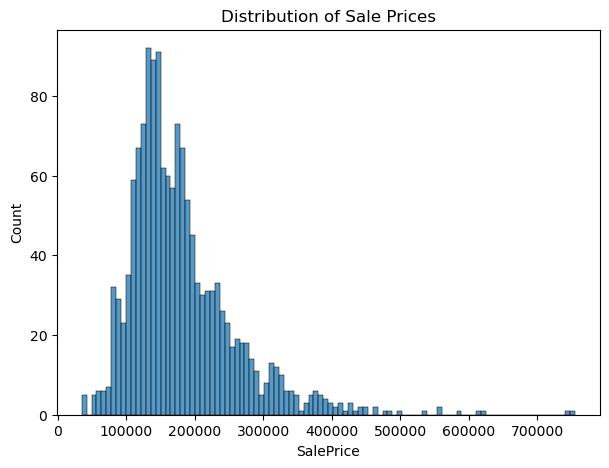

In [85]:
plt.figure(figsize=(7, 5))
sns.histplot(house['SalePrice'], bins=100)
plt.title('Distribution of Sale Prices')

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>],
       [<Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageCars'}>,
        <Axes: title={'center': 'GarageArea'}>],
       [<Axes: title={'center': 

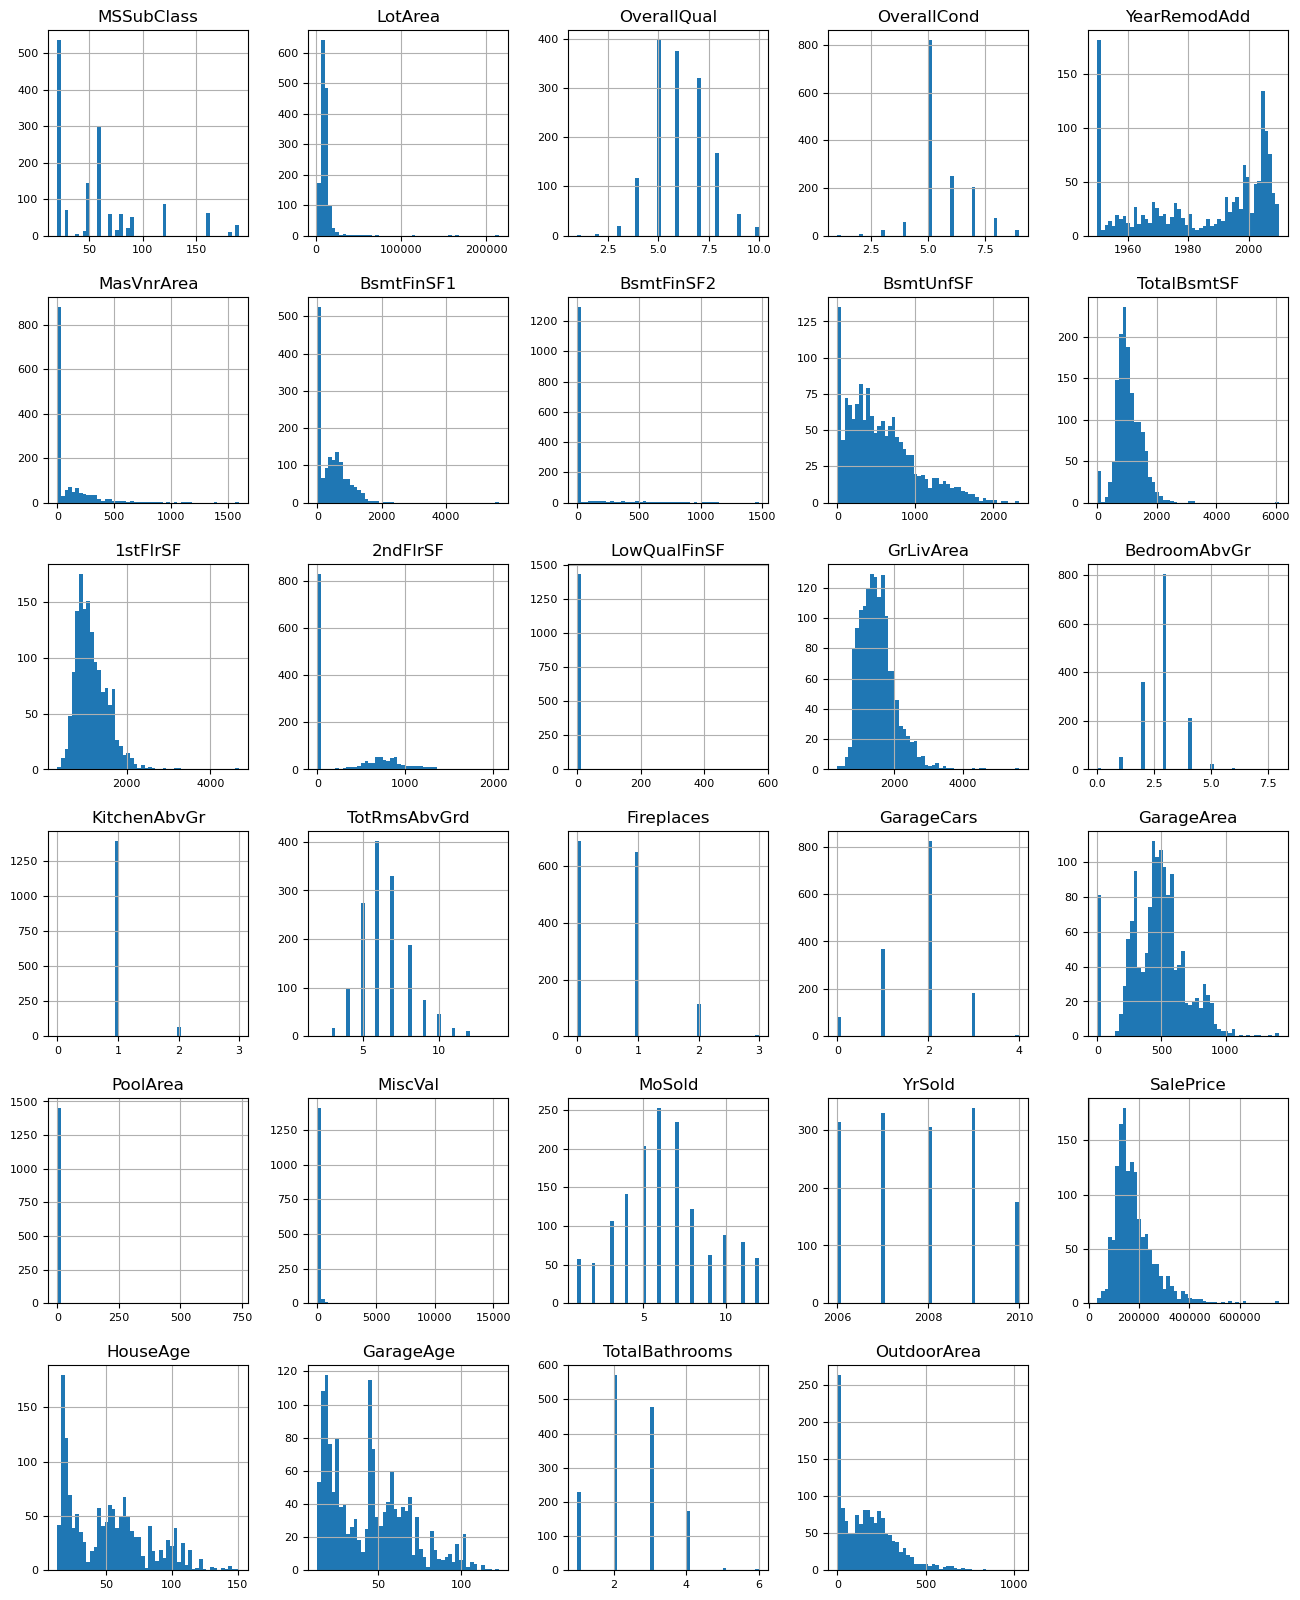

In [56]:
hdata = house.select_dtypes(include='number')
hdata.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

<Axes: >

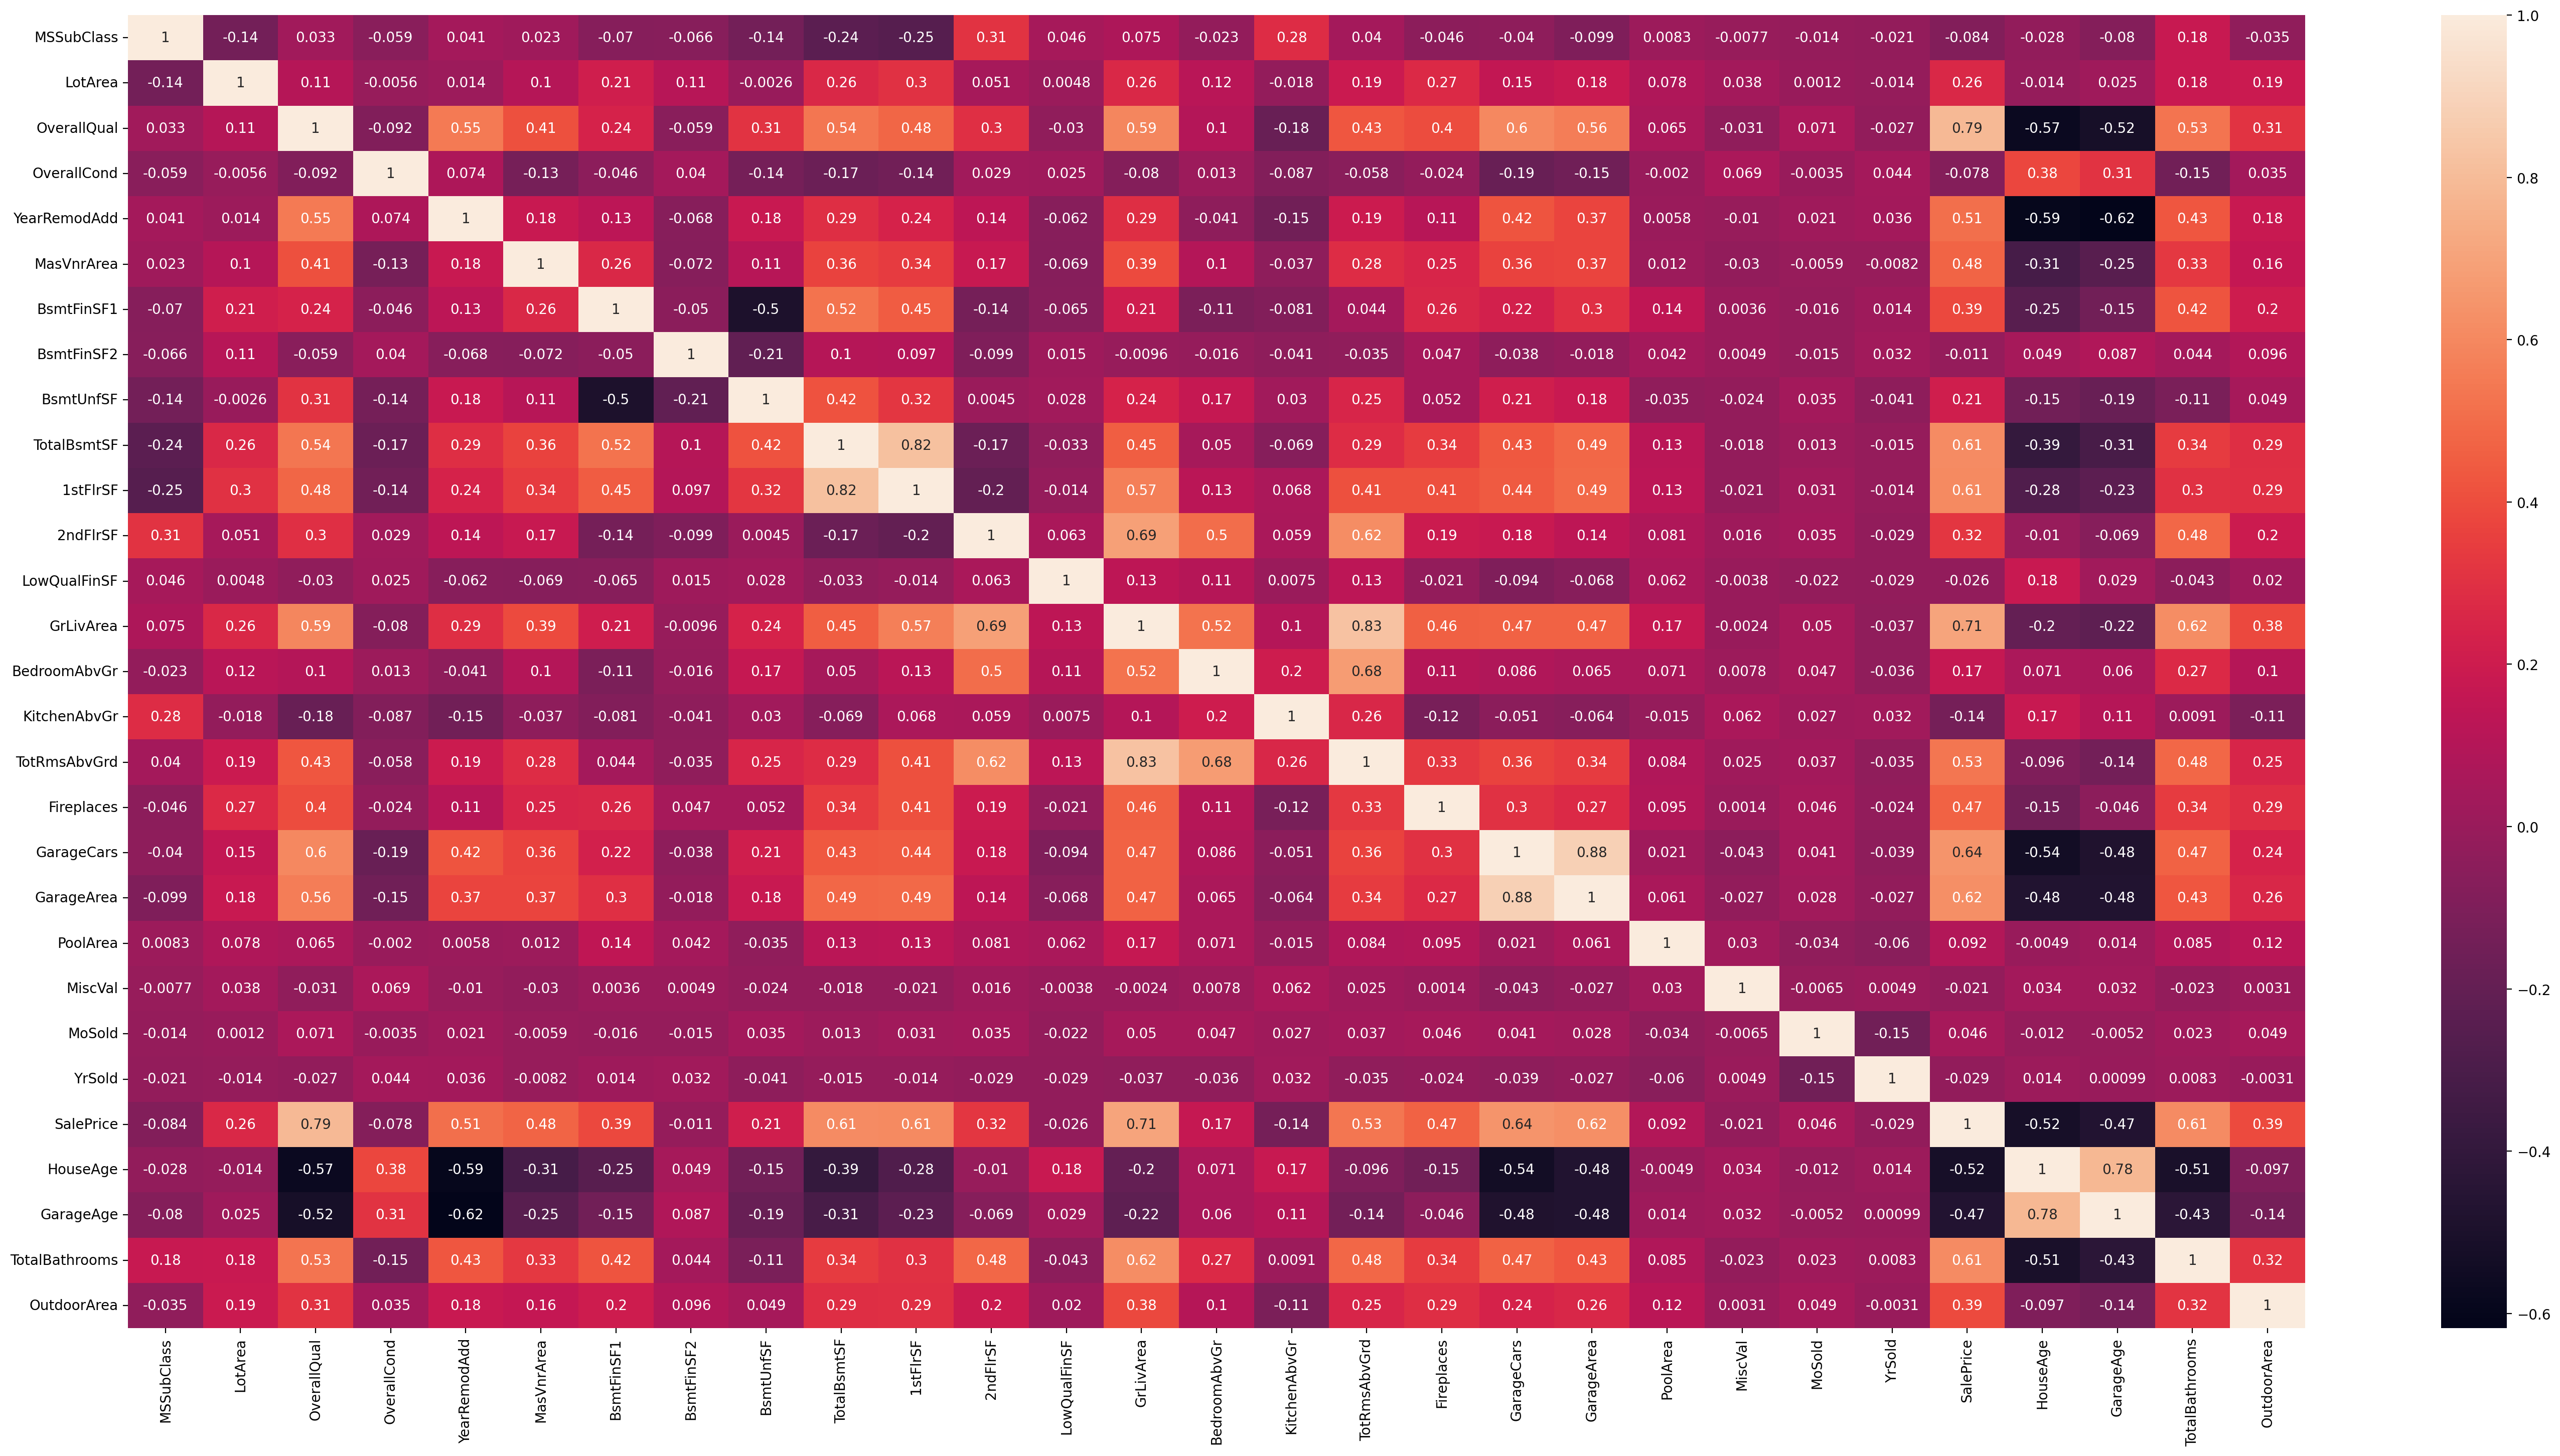

In [87]:
plt.figure(figsize=(35,17),dpi=200)
sns.heatmap(hdata.corr(),annot=True)

In [58]:
hdata.corr()['SalePrice'].sort_values(ascending=False)
columns_to_remove = hdata.corr()[((hdata.corr()['SalePrice']) <= 0.1) & ((hdata.corr()['SalePrice']) >= -0.1)].index
house.drop(columns=columns_to_remove, inplace=True)
print(columns_to_remove)

Index(['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


## Encoding Categorical columns

In [59]:
#print the categorical columns
house.select_dtypes(include=['object']).columns.tolist()

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [60]:
house.select_dtypes(include=['object'])

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [61]:
columns_to_concat = ['MSZoning','Neighborhood']
house['Location Information'] = house[columns_to_concat].astype(str).agg('-'.join, axis=1)
house.drop(columns=['MSZoning','Neighborhood'], inplace=True)


In [91]:
features = house.columns.drop('SalePrice')

num_features = len(features)

print("Number of features:", num_features)
print('==============')
print(features)

Number of features: 57
Index(['LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'HouseAge', 'GarageAge',
       'TotalBathrooms', 'OutdoorArea', 'Location Information'],
      dtype='object')


In [63]:
odata = house.select_dtypes(include=['object']).columns.tolist() 
encoder = LabelEncoder()
for col in odata:
    house[col] = encoder.fit_transform(house[col])

## Split data into training and testing sets

In [64]:
X = house.drop('SalePrice',axis=1)
X = np.array(X)
y = house.SalePrice
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2, random_state=42)


In [65]:
X.shape

(1460, 57)

# Models

## Linear Regression

In [66]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [67]:
print(f"Training: {100*model.score(X_train, y_train):.2f}%")
print(f"Test: {100*model.score(X_test, y_test):.2f}%")

Training: 83.51%
Test: 85.27%


### Model Visualization

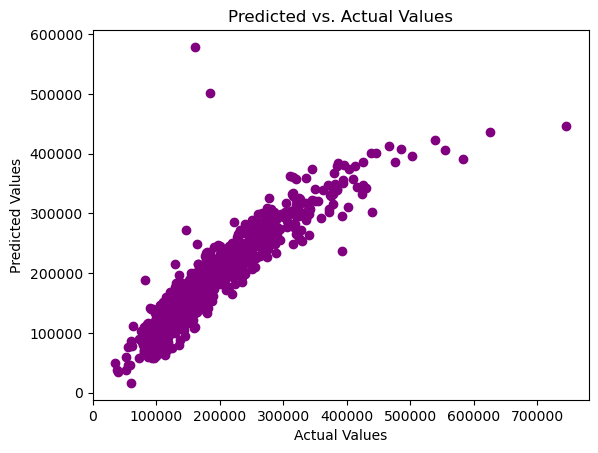

In [68]:
# Predicted vs. Actual plot
plt.scatter(y_train, model.predict(X_train), color='purple')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()


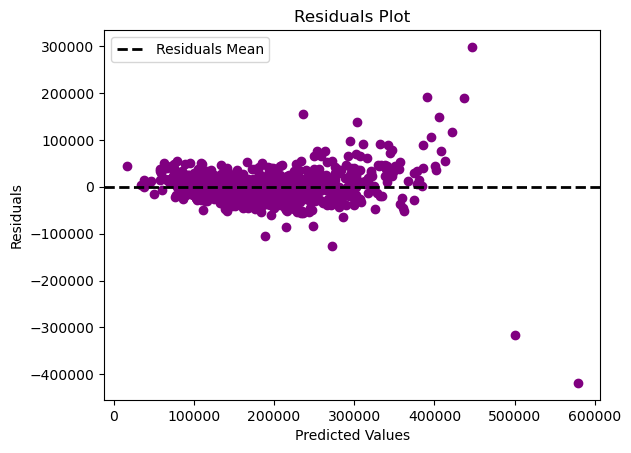

In [69]:
residuals = y_train - model.predict(X_train)

plt.scatter(model.predict(X_train), residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2, label='Residuals Mean')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()


## K Nearest Neighbor

### Preproccessing the data for KNN

In [70]:
house.corr()['SalePrice'].sort_values(ascending=False)
columns_to_remove = house.corr()[((house.corr()['SalePrice']) <= 0.3) & ((house.corr()['SalePrice']) >= -0.3)].index
knn_house = house.drop(columns=columns_to_remove)

In [71]:
X = knn_house.drop('SalePrice',axis=1)
y = knn_house.SalePrice
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
X = np.array(X)

In [73]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [75]:
print(f"Training: {100*knn.score(X_train, y_train):.2f}%")
print(f"Test: {100*knn.score(X_test, y_test):.2f}%")

Training: 88.41%
Test: 80.29%


### Hyperparameter tuning

In [76]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [4, 5, 6, 7],  # Adjust as needed
    'weights': ['uniform', 'distance'],  # Adjust as needed
    'p': [1, 2],  # Adjust as needed (p=1 for Manhattan distance, p=2 for Euclidean distance)
}

# Create GridSearchCV
k_folds = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, scoring='accuracy', cv=k_folds, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

c:\Users\haazm\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [4, 5, 6, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [93]:
best_knn = grid_search.best_estimator_
best_knn

KNeighborsRegressor(n_neighbors=4, p=1)

In [78]:
print(f"Training: {100*best_knn.score(X_train, y_train):.2f}%")
print(f"Test: {100*best_knn.score(X_test, y_test):.2f}%")

Training: 88.13%
Test: 85.06%


### Model Visualization

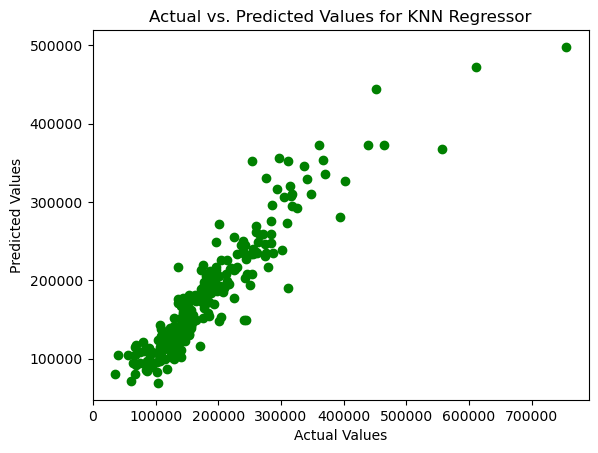

In [79]:
y_pred = best_knn.predict(X_test)

# Scatter plot
plt.scatter(y_test, y_pred, color='green')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for KNN Regressor')
plt.show()

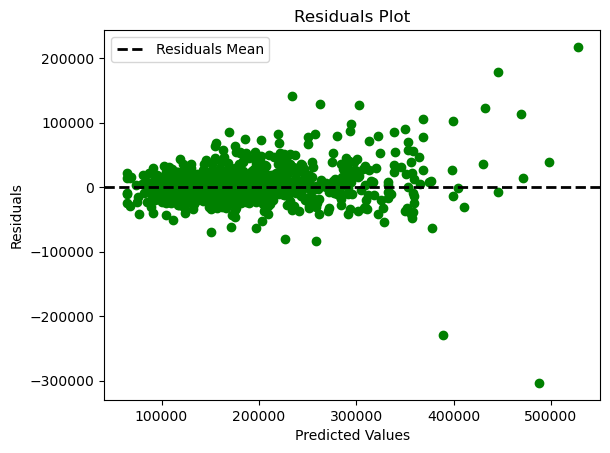

In [80]:
residuals = y_train - best_knn.predict(X_train)

plt.scatter(best_knn.predict(X_train), residuals, color='green')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2, label='Residuals Mean')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()
